In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LassoCV, Ridge, RidgeCV
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('Hitters.csv').dropna()

In [3]:
#get label and numeric features
y = data.Salary
X = data.drop(data.columns[0], axis=1)
X = X.drop(columns=['League', 'Division', 'NewLeague', 'Salary'])

In [4]:
X.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25


In [5]:
def count(coefs):
    rtv=0
    for x in coefs:
        if x != 0:
            rtv = rtv + 1
    return rtv

In [6]:
def get_coefs(model, alphas, X, y, final3=False):
    coefs = []
    flag = True
    for alpha in alphas:
        model.set_params(alpha=alpha)
        model.fit(X, y)
        coefs.append(model.coef_)
        
        if final3:
            if count(model.coef_)==3 and flag:
                f3 = []
                for i in range(0, len(model.coef_)):
                    if model.coef_[i]!=0:
                        f3.append(list(X)[i])
                print("final three predictors: ")
                print(f3)
                flag=False
        
    return coefs

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Lasso

In [8]:
lasso = Lasso(normalize=True, max_iter=1e5)
# alpha values
alphas = np.logspace(-3, 3, 200)
# coefficients and  print final three predictors
coefs = get_coefs(lasso, alphas, X, y, True)

final three predictors: 
['Hits', 'CRuns', 'CRBI']


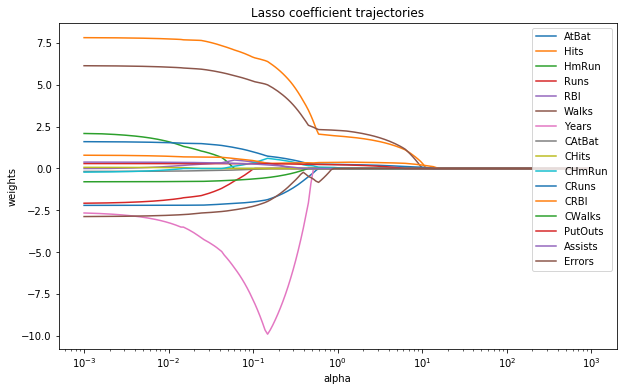

In [9]:
# visualization of the coefficient trajectories
plt.figure(figsize=(10, 6))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Lasso coefficient trajectories')
plt.axis('tight')
plt.legend(X, loc=1)

In [10]:
lassocv = LassoCV(alphas = None, max_iter = 10000, normalize = True, cv = 10)
lassocv.fit(X, y)
print("Lasso optimal alpha: ", lassocv.alpha_)

Lasso optimal alpha:  0.0635481759985745


In [11]:
lasso = Lasso(max_iter = 100000, normalize = True)
lasso.set_params(alpha=lassocv.alpha_)
lasso.fit(X_train, y_train)
print("Number of predictors left: ", count(lasso.coef_))
print("Model MSE: ", mean_squared_error(y_test, lasso.predict(X_test)))

Number of predictors left:  14
Model MSE:  101741.19073956067


# Ridge

In [12]:
ridge = Ridge(normalize=True)
alphas = np.logspace(-3, 3, 200)
coefs = get_coefs(ridge, alphas, X, y)

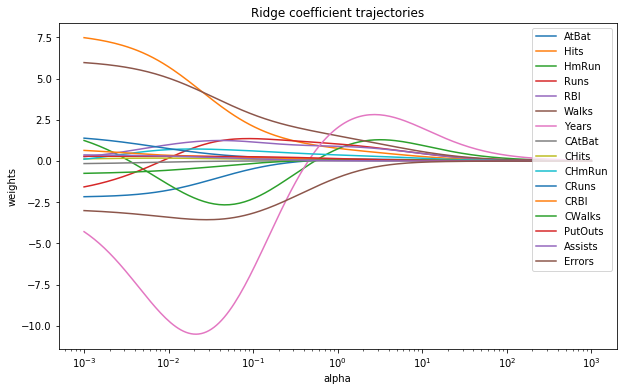

In [13]:
# visualization of the coefficient trajectories
plt.figure(figsize=(10, 6))
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficient trajectories')
plt.axis('tight')
plt.legend(X, loc=1)

In [14]:
ridgecv = RidgeCV(alphas = alphas, normalize = True, cv = 10)
ridgecv.fit(X, y)
print("ridge optimal alpha: ", ridgecv.alpha_)

ridge optimal alpha:  0.9658832241158698


C:\Users\kevin\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [15]:
ridge = Ridge(normalize=True, alpha=ridgecv.alpha_)
ridge.fit(X_train, y_train)
print("Model MSE: ", mean_squared_error(y_test, ridge.predict(X_test)))

Model MSE:  134626.9042205869
